In [4]:
!pip install spacy pandas matplotlib seaborn
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 103.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [5]:
import pandas as pd
import spacy
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
nlp = spacy.load("en_core_web_sm")

In [13]:
processed_docs = list(nlp.pipe(summaries))

print(f"Successfully processed {len(processed_docs)} summaries.")
print("First processed document (first 5 tokens):")
print([token.text for token in processed_docs[0][:5]])

Successfully processed 200 summaries.
First processed document (first 5 tokens):
['Stereo', 'matching', 'is', 'one', 'of']


In [14]:
all_entities = []
for doc in processed_docs:
    all_entities.extend([(ent.text, ent.label_) for ent in doc.ents])

entity_counts = Counter(all_entities)

print(f"Total unique entities found: {len(entity_counts)}")
print("Top 10 most common entities:")
for entity, count in entity_counts.most_common(10):
    print(f"  {entity[0]} ({entity[1]}): {count}")

Total unique entities found: 593
Top 10 most common entities:
  two (CARDINAL): 77
  first (ORDINAL): 43
  3D (ORG): 23
  U-Net (ORG): 21
  three (CARDINAL): 20
  2D (CARDINAL): 20
  CNN (ORG): 18
  1 (CARDINAL): 17
  2 (CARDINAL): 17
  one (CARDINAL): 15


/tmp/ipython-input-3507332460.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Entity Type', y='Count', data=df_entity_types, palette='viridis')


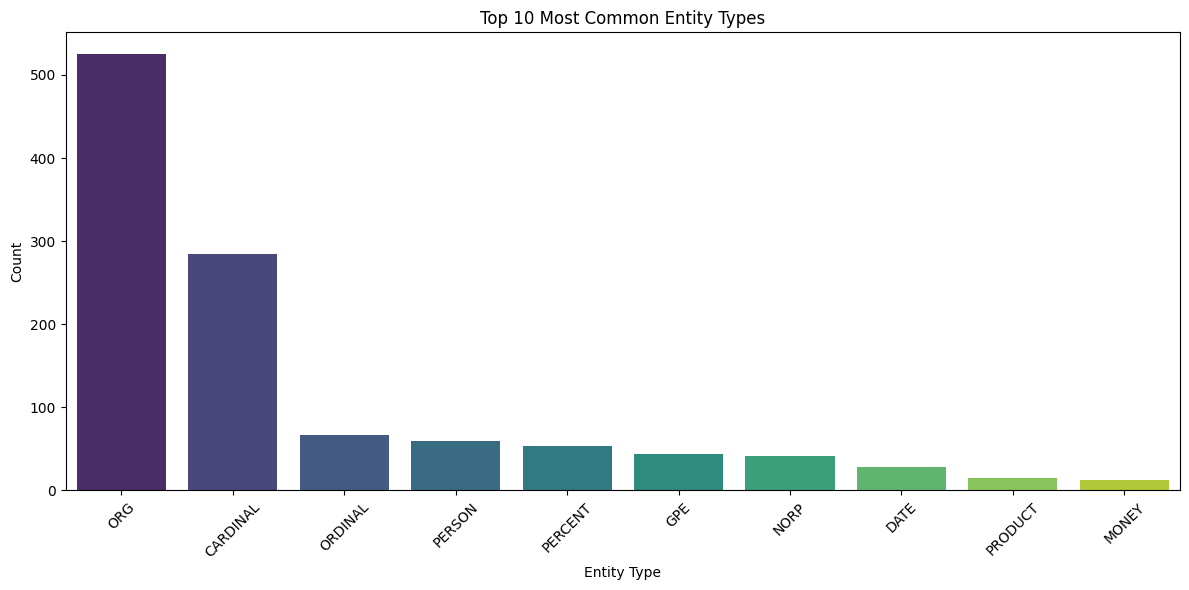

In [15]:
entity_type_counts = Counter([label for text, label in all_entities])

df_entity_types = pd.DataFrame(entity_type_counts.most_common(10), columns=['Entity Type', 'Count'])

plt.figure(figsize=(12, 6))
sns.barplot(x='Entity Type', y='Count', data=df_entity_types, palette='viridis')
plt.title('Top 10 Most Common Entity Types')
plt.xlabel('Entity Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
import pandas as pd

df = pd.read_csv('/content/arxiv_data.csv')
df.head()

,titles,summaries,terms
0,Survey on Semantic Stereo Matching / Semantic ...,Stereo matching is one of the widely used tech...,"['cs.CV', 'cs.LG']"
1,FUTURE-AI: Guiding Principles and Consensus Re...,The recent advancements in artificial intellig...,"['cs.CV', 'cs.AI', 'cs.LG']"
2,Enforcing Mutual Consistency of Hard Regions f...,"In this paper, we proposed a novel mutual cons...","['cs.CV', 'cs.AI']"
3,Parameter Decoupling Strategy for Semi-supervi...,Consistency training has proven to be an advan...,['cs.CV']
4,Background-Foreground Segmentation for Interio...,"To ensure safety in automated driving, the cor...","['cs.CV', 'cs.LG']"


In [17]:
# Select a sample summary from the DataFrame
sample_summary = df['summaries'].iloc[0]

# Process the sample summary with the loaded spaCy model
doc = nlp(sample_summary)

print("--- Original Sample Summary ---")
print(sample_summary)
print("\n--- Processed Document Details ---")
print("Tokens and their Part-of-Speech tags:")
for token in doc:
    print(f"{token.text:<15} {token.pos_:<10} {token.dep_:<15}")

print("\nNamed Entities:")
if doc.ents:
    for ent in doc.ents:
        print(f"{ent.text:<20} {ent.label_:<10}")
else:
    print("No named entities found in this summary.")

--- Original Sample Summary ---
Stereo matching is one of the widely used techniques for inferring depth from
stereo images owing to its robustness and speed. It has become one of the major
topics of research since it finds its applications in autonomous driving,
robotic navigation, 3D reconstruction, and many other fields. Finding pixel
correspondences in non-textured, occluded and reflective areas is the major
challenge in stereo matching. Recent developments have shown that semantic cues
from image segmentation can be used to improve the results of stereo matching.
Many deep neural network architectures have been proposed to leverage the
advantages of semantic segmentation in stereo matching. This paper aims to give
a comparison among the state of art networks both in terms of accuracy and in
terms of speed which are of higher importance in real-time applications.

--- Processed Document Details ---
Tokens and their Part-of-Speech tags:
Stereo          PROPN      compound       
mat

In [18]:
all_noun_chunks = []
for doc in processed_docs:
    for chunk in doc.noun_chunks:
        all_noun_chunks.append(chunk.text.lower())

noun_chunk_counts = Counter(all_noun_chunks)

print("Top 10 most common noun chunks:")
for noun_chunk, count in noun_chunk_counts.most_common(10):
    print(f"  '{noun_chunk}': {count}")

Top 10 most common noun chunks:
  'we': 540
  'which': 172
  'that': 144
  'it': 120
  'this paper': 74
  'the-art': 72
  'our method': 50
  'image segmentation': 47
  'this work': 47
  'medical image segmentation': 37


In [19]:
from spacy.matcher import Matcher

# Initialize the Matcher with the shared vocabulary
matcher = Matcher(nlp.vocab)

# Define patterns for common technical terms
patterns = [
    [{'LOWER': 'deep'}, {'LOWER': 'learning'}], # Deep Learning
    [{'LOWER': 'neural'}, {'LOWER': 'network'}], # Neural Network
    [{'LOWER': 'computer'}, {'LOWER': 'vision'}], # Computer Vision
    [{'LOWER': 'natural'}, {'LOWER': 'language'}, {'LOWER': 'processing'}], # Natural Language Processing
    [{'LOWER': 'semantic'}, {'LOWER': 'segmentation'}], # Semantic Segmentation
    [{'LOWER': 'generative'}, {'LOWER': 'adversarial'}, {'LOWER': 'network'}], # Generative Adversarial Network
    [{'LOWER': 'reinforcement'}, {'LOWER': 'learning'}], # Reinforcement Learning
    [{'LOWER': 'machine'}, {'LOWER': 'learning'}], # Machine Learning
    [{'LOWER': 'graph'}, {'LOWER': 'neural'}, {'LOWER': 'network'}], # Graph Neural Network
    [{'LOWER': 'recurrent'}, {'LOWER': 'neural'}, {'LOWER': 'network'}], # Recurrent Neural Network
    [{'LOWER': 'convolutional'}, {'LOWER': 'neural'}, {'LOWER': 'network'}], # Convolutional Neural Network
    [{'LOWER': 'transformer'}]
]

# Add patterns to the matcher with descriptive IDs
matcher.add('TECH_TERM', patterns)

all_matched_terms = []

for doc in processed_docs:
    matches = matcher(doc)
    for match_id, start, end in matches:
        # Get the string representation of the matched span
        span = doc[start:end]
        all_matched_terms.append(span.text.lower())

# Count the occurrences of each matched term
tech_term_counts = Counter(all_matched_terms)

print("Top 10 most common matched technical terms:")
for term, count in tech_term_counts.most_common(10):
    print(f"  '{term}': {count}")

Top 10 most common matched technical terms:
  'transformer': 57
  'semantic segmentation': 50
  'deep learning': 45
  'neural network': 20
  'computer vision': 20
  'machine learning': 17
  'reinforcement learning': 13
  'convolutional neural network': 6
  'recurrent neural network': 1


/tmp/ipython-input-2386963848.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Noun Phrase', y='Count', data=df_noun_phrases, palette='plasma')


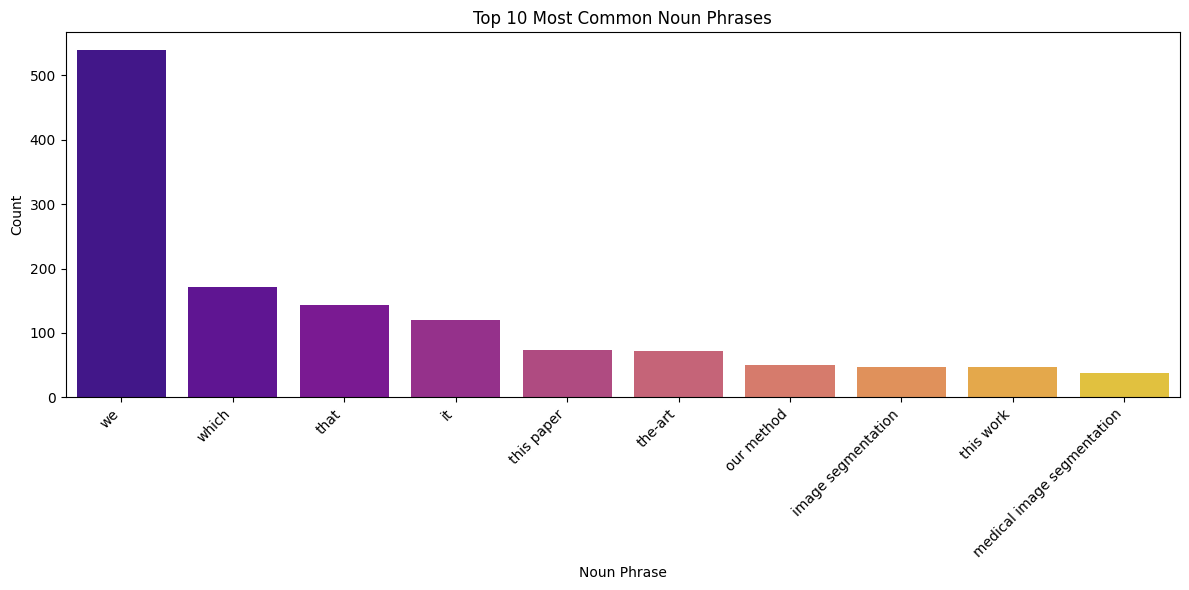

/tmp/ipython-input-2386963848.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Entity', y='Count', data=df_common_entities, palette='coolwarm')


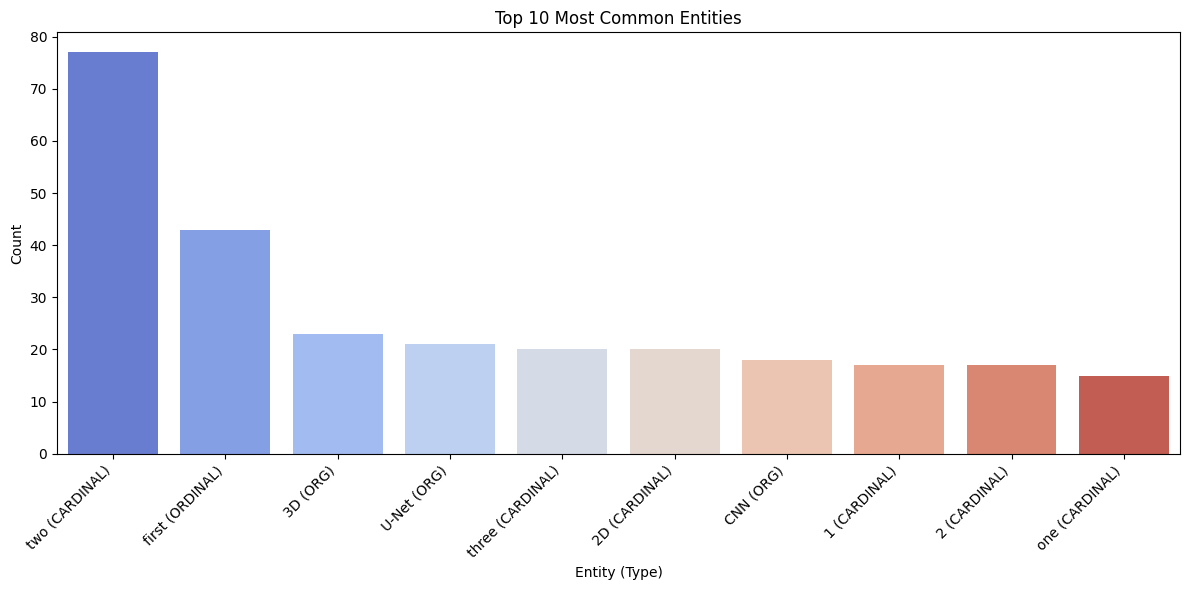

In [20]:
# Visualize Top 10 Noun Phrases
df_noun_phrases = pd.DataFrame(noun_chunk_counts.most_common(10), columns=['Noun Phrase', 'Count'])

plt.figure(figsize=(12, 6))
sns.barplot(x='Noun Phrase', y='Count', data=df_noun_phrases, palette='plasma')
plt.title('Top 10 Most Common Noun Phrases')
plt.xlabel('Noun Phrase')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualize Top 10 Most Common Entities (individual entities with labels)
df_common_entities = pd.DataFrame(entity_counts.most_common(10), columns=['Entity_Tuple', 'Count'])
df_common_entities['Entity'] = df_common_entities['Entity_Tuple'].apply(lambda x: f"{x[0]} ({x[1]})")

plt.figure(figsize=(12, 6))
sns.barplot(x='Entity', y='Count', data=df_common_entities, palette='coolwarm')
plt.title('Top 10 Most Common Entities')
plt.xlabel('Entity (Type)')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()